<a href="https://colab.research.google.com/github/leihuang/scrapbook/blob/master/StitchLightgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install lightgbm==3.3.2

     |████████████████████████████████| 2.0 MB 5.0 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import lightgbm as lgb


lgb.__version__

'3.3.2'

In [4]:
X1, y1 = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, random_state=42)
X2, y2 = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, random_state=43)

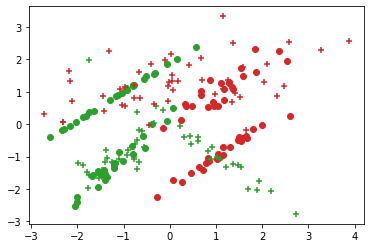

In [8]:
fig, ax = plt.subplots()
ax.scatter(*X1[y1==0].T, marker='o', color='tab:green')
ax.scatter(*X1[y1==1].T, marker='o', color='tab:red')
ax.scatter(*X2[y2==0].T, marker='+', color='tab:green')
ax.scatter(*X2[y2==1].T, marker='+', color='tab:red')
plt.show()

In [16]:
hparams = {'n_estimators': 2, 'num_leaves': 3}

m1 = lgb.LGBMClassifier(**hparams).fit(X1, y1)
m2 = lgb.LGBMClassifier(**hparams).fit(X2, y2)

In [17]:
m1.booster_.trees_to_dataframe()

,tree_index,node_depth,node_index,left_child,right_child,parent_index,split_feature,split_gain,threshold,decision_type,missing_direction,missing_type,value,weight,count
0,0,1,0-S0,0-S1,0-L1,None,Column_0,84.775597,0.202860,<=,left,None,0.000000,0.000000,100
1,0,2,0-S1,0-L0,0-L2,0-S0,Column_0,0.944056,-1.019291,<=,left,None,-0.176923,13.000000,52
2,0,3,0-L0,None,None,0-S1,None,NaN,NaN,None,None,None,-0.200000,7.500000,30
3,0,3,0-L2,None,None,0-S1,None,NaN,NaN,None,None,None,-0.145455,5.500000,22
4,0,2,0-L1,None,None,0-S0,None,NaN,NaN,None,None,None,0.191667,12.000000,48
5,1,1,1-S0,1-S1,1-L1,None,Column_0,69.306702,0.202860,<=,left,None,0.000000,0.000000,100
6,1,2,1-S1,1-L0,1-L2,1-S0,Column_0,0.795244,-1.019291,<=,left,None,-0.160558,12.896500,52
7,1,3,1-L0,None,None,1-S1,None,NaN,NaN,None,None,None,-0.181873,7.425497,30
8,1,3,1-L2,None,None,1-S1,None,NaN,NaN,None,None,None,-0.131628,5.471011,22
9,1,2,1-L1,None,None,1-S0,None,NaN,NaN,None,None,None,0.174148,11.890463,48


In [18]:
m1.booster_.model_to_string()

'tree\nversion=v3\nnum_class=1\nnum_tree_per_iteration=1\nlabel_index=0\nmax_feature_idx=1\nobjective=binary sigmoid:1\nfeature_names=Column_0 Column_1\nfeature_infos=[-2.5859085601762173:2.591239462318816] [-2.5234340710091248:2.3886935264317213]\ntree_sizes=423 443\n\nTree=0\nnum_leaves=3\nnum_cat=0\nsplit_feature=0 0\nsplit_gain=84.7756 0.944056\nthreshold=0.20286009456201246 -1.0192912967317491\ndecision_type=2 2\nleft_child=1 -1\nright_child=-2 -3\nleaf_value=-0.19999999999999998 0.19166666666666668 -0.14545454545454539\nleaf_weight=7.5 11.999999999999998 5.5000000000000018\nleaf_count=30 48 22\ninternal_value=0 -0.176923\ninternal_weight=0 13\ninternal_count=100 52\nis_linear=0\nshrinkage=0.1\n\n\nTree=1\nnum_leaves=3\nnum_cat=0\nsplit_feature=0 0\nsplit_gain=69.3067 0.795244\nthreshold=0.20286009456201246 -1.0192912967317491\ndecision_type=2 2\nleft_child=1 -1\nright_child=-2 -3\nleaf_value=-0.18187308119005768 0.17414810683367268 -0.13162845592168049\nleaf_weight=7.425497174263

In [21]:
d = m1.booster_.dump_model()

list(d.keys())

['name',
 'version',
 'num_class',
 'num_tree_per_iteration',
 'label_index',
 'max_feature_idx',
 'objective',
 'average_output',
 'feature_names',
 'monotone_constraints',
 'feature_infos',
 'tree_info',
 'feature_importances',
 'pandas_categorical']

In [39]:
for i, (k, v) in enumerate(d.items()):
    print('{:<30}  {:<12}'.format(k, str(v)))

name                            tree        
version                         v3          
num_class                       1           
num_tree_per_iteration          1           
label_index                     0           
max_feature_idx                 1           
objective                       binary sigmoid:1
average_output                  False       
feature_names                   ['Column_0', 'Column_1']
monotone_constraints            []          
feature_infos                   {'Column_0': {'min_value': -2.5859085601762173, 'max_value': 2.591239462318816, 'values': []}, 'Column_1': {'min_value': -2.5234340710091248, 'max_value': 2.3886935264317213, 'values': []}}
tree_info                       [{'tree_index': 0, 'num_leaves': 3, 'num_cat': 0, 'shrinkage': 0.1, 'tree_structure': {'split_index': 0, 'split_feature': 0, 'split_gain': 84.77559661865234, 'threshold': 0.20286009456201246, 'decision_type': '<=', 'default_left': True, 'missing_type': 'None', 'internal_value': 0

In [40]:
d['tree_info'][0]

{'num_cat': 0,
 'num_leaves': 3,
 'shrinkage': 0.1,
 'tree_index': 0,
 'tree_structure': {'decision_type': '<=',
  'default_left': True,
  'internal_count': 100,
  'internal_value': 0,
  'internal_weight': 0,
  'left_child': {'decision_type': '<=',
   'default_left': True,
   'internal_count': 52,
   'internal_value': -0.176923,
   'internal_weight': 13,
   'left_child': {'leaf_count': 30,
    'leaf_index': 0,
    'leaf_value': -0.19999999999999998,
    'leaf_weight': 7.5},
   'missing_type': 'None',
   'right_child': {'leaf_count': 22,
    'leaf_index': 2,
    'leaf_value': -0.1454545454545454,
    'leaf_weight': 5.500000000000002},
   'split_feature': 0,
   'split_gain': 0.94405597448349,
   'split_index': 1,
   'threshold': -1.0192912967317491},
  'missing_type': 'None',
  'right_child': {'leaf_count': 48,
   'leaf_index': 1,
   'leaf_value': 0.19166666666666668,
   'leaf_weight': 11.999999999999998},
  'split_feature': 0,
  'split_gain': 84.77559661865234,
  'split_index': 0,
  'th

In [41]:
d['tree_info'][1]

{'num_cat': 0,
 'num_leaves': 3,
 'shrinkage': 0.1,
 'tree_index': 1,
 'tree_structure': {'decision_type': '<=',
  'default_left': True,
  'internal_count': 100,
  'internal_value': 0,
  'internal_weight': 0,
  'left_child': {'decision_type': '<=',
   'default_left': True,
   'internal_count': 52,
   'internal_value': -0.160558,
   'internal_weight': 12.8965,
   'left_child': {'leaf_count': 30,
    'leaf_index': 0,
    'leaf_value': -0.18187308119005768,
    'leaf_weight': 7.4254971742630005},
   'missing_type': 'None',
   'right_child': {'leaf_count': 22,
    'leaf_index': 2,
    'leaf_value': -0.1316284559216805,
    'leaf_weight': 5.471011370420458},
   'split_feature': 0,
   'split_gain': 0.7952439785003662,
   'split_index': 1,
   'threshold': -1.0192912967317491},
  'missing_type': 'None',
  'right_child': {'leaf_count': 48,
   'leaf_index': 1,
   'leaf_value': 0.17414810683367268,
   'leaf_weight': 11.89046287536621},
  'split_feature': 0,
  'split_gain': 69.30670166015625,
  's